<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

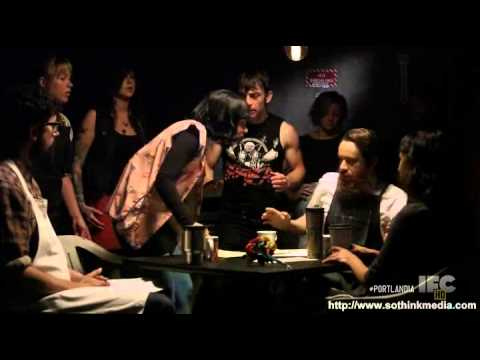

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/yonipineda/lambda_folder/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
# Start here 
# set shop as df
df = shops

# check shape
df.shape

(7616, 3)

In [4]:
# check df
df.head(5)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

## Token Count Using spacy and nltk
    
    - Removed the dates using the re package
    - Used nltk.corpus stopwords to remove words not useful for our purpose--stopwords(english)
    - Lowered strings
    - Removed whitespaces
    

In [41]:
# imports
import spacy 
import seaborn as sns
import re 
import nltk 
import pandas as pd
import numpy as np

In [6]:
# load in the model 
nlp = spacy.load('en_core_web_lg')

In [7]:
# tokenization 
df['doc'] = [nlp(text) for text in df.full_review_text]

In [8]:
# making sure the doc column was created 
# asserting that ['df.full_review_text'] was tokenized
df.head(5)

# nice, the ['df.full_review_text'] was converted into a set

,coffee_shop_name,full_review_text,star_rating,doc
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"( , 11/25/2016, 1, check, -, in, Love, love, l..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"( , 12/2/2016, Listed, in, Date, Night, :, Aus..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"( , 11/30/2016, 1, check, -, in, Listed, in, B..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"( , 11/25/2016, Very, cool, decor, !, Good, dr..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"( , 12/3/2016, 1, check, -, in, They, are, loc..."


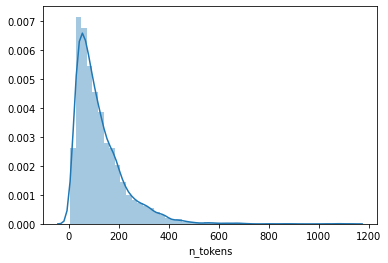

In [9]:
# creating the first visualization

# total number of tokens in the row 
df['n_tokens'] = [len(t) for t in df.doc]

# plot 
plot = sns.distplot(df.n_tokens)

plot

In [10]:
# check value counts of df['n_tokens']
# top20 token counts
df['n_tokens'].value_counts()[:20]

56    73
49    67
40    65
68    64
37    64
71    62
34    61
50    61
29    61
65    60
45    59
33    59
75    57
30    57
41    55
96    55
26    55
35    55
44    54
43    54
Name: n_tokens, dtype: int64

In [11]:
# check df
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"( , 11/25/2016, 1, check, -, in, Love, love, l...",118
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"( , 12/2/2016, Listed, in, Date, Night, :, Aus...",73
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"( , 11/30/2016, 1, check, -, in, Listed, in, B...",279
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"( , 11/25/2016, Very, cool, decor, !, Good, dr...",83
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"( , 12/3/2016, 1, check, -, in, They, are, loc...",131


In [12]:
# lowercase everything
df['full_review_text'] = df['full_review_text'].map(lambda x: x.lower())

# strip leading whitespaces 
df['full_review_text'] = df['full_review_text'].map(lambda x: x.strip())

In [13]:
# making sure the changes were properly applied 
df['full_review_text']

0       11/25/2016 1 check-in love love loved the atmo...
1       12/2/2016 listed in date night: austin, ambian...
2       11/30/2016 1 check-in listed in brunch spots i...
3       11/25/2016 very cool decor! good drinks nice s...
4       12/3/2016 1 check-in they are located within t...
                              ...                        
7611    2/19/2015 i actually step into this restaurant...
7612    1/21/2016 ok, the steeping room is awesome. ho...
7613    4/30/2015 loved coming here for tea, and the a...
7614    8/2/2015 the food is just average. the booths ...
7615    5/23/2015 i finally stopped in for lunch with ...
Name: full_review_text, Length: 7616, dtype: object

In [14]:
# Using re(Regular Expression)
# The dates have no significant importance on wether or not a coffee shop is good
# Ill remove them using the re package
df['full_review_text'] = df['full_review_text'].map(lambda x: re.sub("[^a-z\s]", "", x))

In [16]:
# no dates
df['full_review_text']

0         checkin love love loved the atmosphere every...
1        listed in date night austin ambiance in austi...
2         checkin listed in brunch spots i loved the e...
3        very cool decor good drinks nice seating  how...
4         checkin they are located within the northcro...
                              ...                        
7611     i actually step into this restaurant by chanc...
7612     ok the steeping room is awesome how do they h...
7613     loved coming here for tea and the atmosphere ...
7614     the food is just average the booths didnt fee...
7615     i finally stopped in for lunch with my collea...
Name: full_review_text, Length: 7616, dtype: object

In [15]:
# asseriting changes were applied
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens
0,The Factory - Cafe With a Soul,checkin love love loved the atmosphere every...,5.0 star rating,"( , 11/25/2016, 1, check, -, in, Love, love, l...",118
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austi...,4.0 star rating,"( , 12/2/2016, Listed, in, Date, Night, :, Aus...",73
2,The Factory - Cafe With a Soul,checkin listed in brunch spots i loved the e...,4.0 star rating,"( , 11/30/2016, 1, check, -, in, Listed, in, B...",279
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating how...,2.0 star rating,"( , 11/25/2016, Very, cool, decor, !, Good, dr...",83
4,The Factory - Cafe With a Soul,checkin they are located within the northcro...,4.0 star rating,"( , 12/3/2016, 1, check, -, in, They, are, loc...",131


In [17]:
# nltk(Natural Language Tool-Kit)
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
# Using the stopwords stored in the english language to have our data rid of words 
# that are not useful for finding out wether or not a coffee shop is good or not.
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
df['full_review_text'] = df['full_review_text'].apply(lambda x: " ".join(w for w in x.split() if w not in stopwords))

In [20]:
# re-tokenize doc with all the changes made to df.full_review_text
df['doc'] = [nlp(t) for t in df.full_review_text]

In [22]:
# assert changes were made
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0 star rating,"(checkin, love, love, loved, atmosphere, every...",118
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0 star rating,"(listed, date, night, austin, ambiance, austin...",73
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0 star rating,"(checkin, listed, brunch, spots, loved, eclect...",279
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0 star rating,"(cool, decor, good, drinks, nice, seating, how...",83
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0 star rating,"(checkin, located, within, northcross, mall, s...",131


In [23]:
# doc has all the changes made to df.full_review_text
df['doc']

0       (checkin, love, love, loved, atmosphere, every...
1       (listed, date, night, austin, ambiance, austin...
2       (checkin, listed, brunch, spots, loved, eclect...
3       (cool, decor, good, drinks, nice, seating, how...
4       (checkin, located, within, northcross, mall, s...
                              ...                        
7611    (actually, step, restaurant, chance, one, favo...
7612    (ok, steeping, room, awesome, many, great, men...
7613    (loved, coming, tea, atmosphere, pretty, fresh...
7614    (food, average, booths, did, nt, feel, clean, ...
7615    (finally, stopped, lunch, colleague, i, m, gla...
Name: doc, Length: 7616, dtype: object

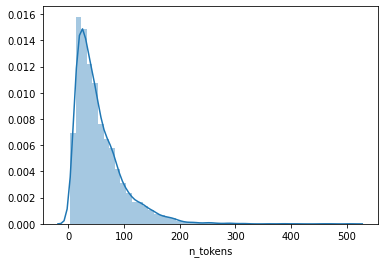

In [28]:
# visualize number of tokens 
# update n_tokens and re-graph
df['n_tokens'] = [len(t) for t in df.doc]

# plot
plot = sns.distplot(df.n_tokens)

plot

In [32]:
# token count top30
# Most tokens fall with 14-50
# defintely different from the previous visualizing/tokenization created without the data cleaning 
df['n_tokens'].value_counts()[:30]

19    138
26    135
20    133
21    133
27    129
14    128
34    128
13    127
23    121
31    118
16    117
18    116
17    115
29    114
24    112
32    112
28    110
25    108
15    106
22    104
30    104
47    103
42     99
33     99
12     98
37     97
36     95
49     91
43     90
45     90
Name: n_tokens, dtype: int64

## Cleaning Ratings

    - Remove everything but the actual numerical rating(5.0, 4.0, etc) using the .strip() and .split() method.
    - Remove whitespace
    - Tokenize Ratings 

In [33]:
# remove whitespace 
df['star_rating'] = df['star_rating'].map(lambda x: x.strip())

In [36]:
# keep only the number and remove the rest 
df['star_rating'] = df['star_rating'].str.split().str[0].str.strip()

In [37]:
# assert changes 
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68


In [38]:
# Only the number remains
df['star_rating']

0       5.0
1       4.0
2       4.0
3       2.0
4       4.0
       ... 
7611    4.0
7612    5.0
7613    4.0
7614    3.0
7615    4.0
Name: star_rating, Length: 7616, dtype: object

In [39]:
# tokenize ratings
df['ratings_tokenized'] = [nlp(t) for t in df.star_rating]

In [40]:
# asssert ratings is tokenized
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens,ratings_tokenized
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,(5.0)
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,(4.0)
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,(4.0)
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39,(2.0)
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,(4.0)


In [42]:
# convert star_ratings to numeric for plotting
df['numeric_ratings'] = pd.to_numeric(df['star_rating'], errors='coerce')

# check
df.head()

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens,ratings_tokenized,numeric_ratings
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,(5.0),5.0
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,(4.0),4.0
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,(4.0),4.0
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39,(2.0),2.0
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,(4.0),4.0


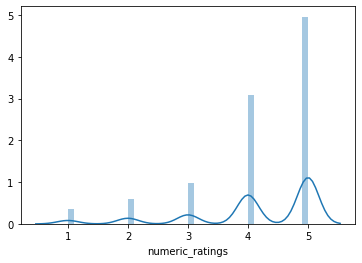

In [47]:
# visualize distribution of ratings
# most ratings fall between 4-5, pretty common.
sns.distplot(df.numeric_ratings)

In [48]:
# further visualization of the distribution of ratings for this coffee shop.
df['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [49]:
# percentage/normalized
# 4-5 is ~80% of ratings given from the users in this dataset.
df['star_rating'].value_counts(normalize=True)

5.0    0.496324
4.0    0.309874
3.0    0.096901
2.0    0.060399
1.0    0.036502
Name: star_rating, dtype: float64

In [50]:
# check shape
df.shape

(7616, 7)

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Good = 4-5, Bad = 1-3

In [99]:
# set good rating
good = df[df['numeric_ratings'] >= 4]

# set okay rating
okay = df[df['numeric_ratings'] == 3]

# set bad rating
bad = df[df['numeric_ratings'] <3]

In [100]:
# check shapes
print(good.shape, okay.shape, bad.shape)

(6140, 7) (738, 7) (738, 7)


In [101]:
738 + 738 == 1476

True

In [88]:
# making sure nothing was lost
6140 + 1476 == 7616

True

In [102]:
# checking good
good.head(5)

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens,ratings_tokenized,numeric_ratings
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,(5.0),5.0
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,(4.0),4.0
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,(4.0),4.0
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,(4.0),4.0
5,The Factory - Cafe With a Soul,checkin cute cafe think moment stepped really ...,4.0,"(checkin, cute, cafe, think, moment, stepped, ...",99,(4.0),4.0


In [105]:
okay.head(5)

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens,ratings_tokenized,numeric_ratings
8,The Factory - Cafe With a Soul,checkin ok lets try approach pros music seatin...,3.0,"(checkin, ok, lets, try, approach, pros, music...",184,(3.0),3.0
11,The Factory - Cafe With a Soul,store decoration honestly coffee made good cof...,3.0,"(store, decoration, honestly, coffee, made, go...",49,(3.0),3.0
12,The Factory - Cafe With a Soul,checkin listed third time charm factory decor ...,3.0,"(checkin, listed, third, time, charm, factory,...",73,(3.0),3.0
33,The Factory - Cafe With a Soul,checkin best friend came factory seeing couple...,3.0,"(checkin, best, friend, came, factory, seeing,...",80,(3.0),3.0
48,The Factory - Cafe With a Soul,checkin love deco lot really good place chill ...,3.0,"(checkin, love, deco, lot, really, good, place...",35,(3.0),3.0


In [103]:
# checking bad
bad.head(5)

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens,ratings_tokenized,numeric_ratings
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39,(2.0),2.0
25,The Factory - Cafe With a Soul,okay visiting friends la trying mint mojito ic...,1.0,"(okay, visiting, friends, la, trying, mint, mo...",91,(1.0),1.0
39,The Factory - Cafe With a Soul,cafe doesnt wifi makes order ipad seriously ex...,1.0,"(cafe, does, nt, wifi, makes, order, ipad, ser...",58,(1.0),1.0
40,The Factory - Cafe With a Soul,honestly place identity crisis great place dat...,2.0,"(honestly, place, identity, crisis, great, pla...",94,(2.0),2.0
58,The Factory - Cafe With a Soul,tough one took children treat one afternoon fi...,2.0,"(tough, one, took, children, treat, one, after...",121,(2.0),2.0


## Viualize words used between 'good' and 'bad'

In [106]:
# good words go first
good_token = ''
for i in good['doc']:
    good_token += str(i)

In [107]:
# check top10 most common words used in good ratings
from collections import Counter
split_good = good_token.split()
Counter = Counter(split_good)
top10_good = Counter.most_common(10)
top10_good

[('coffee', 8013),
 ('place', 4036),
 ('great', 3195),
 ('good', 2962),
 ('like', 2166),
 ('austin', 1863),
 ('get', 1832),
 ('really', 1742),
 ('also', 1697),
 ('one', 1652)]

In [109]:
# okay words go whenever
okay_token = ''
for i in okay['doc']:
    okay_token += str(i)
    
from collections import Counter 
split_okay = okay_token.split()
Counter = Counter(split_okay)
top10_okay = Counter.most_common(10)
top10_okay

[('coffee', 1108),
 ('place', 525),
 ('good', 497),
 ('like', 410),
 ('really', 287),
 ('get', 261),
 ('great', 247),
 ('would', 235),
 ('food', 233),
 ('pretty', 229)]

In [110]:
# bad words go last 
bad_token = ''
for i in bad['doc']:
    bad_token += str(i)
    
# check top10 most common words used in bad ratings
from collections import Counter
split_bad = bad_token.split()
Counter = Counter(split_bad)
top10_bad = Counter.most_common(10)
top10_bad

[('coffee', 930),
 ('place', 516),
 ('like', 452),
 ('good', 338),
 ('one', 336),
 ('get', 298),
 ('service', 260),
 ('time', 249),
 ('would', 240),
 ('food', 229)]

## Using lectore notebook code

In [119]:
# Tokenizer
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [134]:
# hmm, I tried passing in df['doc'] but i recieved an error saying: it was expecting a string not a series
# hmhmhmhmhmhm
words = 'The barbarians are at our gate. Rome will fall as it stands, she cannot take no more for us. We must act'
dos = nlp(words)

# lemma
for d in dos:
    print(d.text, " ", d.lemma_)

The   the
barbarians   barbarian
are   be
at   at
our   -PRON-
gate   gate
.   .
Rome   Rome
will   will
fall   fall
as   as
it   -PRON-
stands   stand
,   ,
she   -PRON-
can   can
not   not
take   take
no   no
more   more
for   for
us   -PRON-
.   .
We   -PRON-
must   must
act   act


In [2]:
# a function to retrieve the lemmas
import spacy
from spacy.tokenizer import Tokenizer

def get_lemmas(text):


    tokenizer = Tokenizer(nlp.vocab)

    STOP_WORDS = nlp.Defaults.stop_words.union(['  ', 'coffee', '-', 'like', 'get', 'would', '-pron-',
                                                '', "'", ' ', '-PRON-'])

    lemmas = []

    doc = nlp(text)


    for token in doc:
        lemmas.append(token.lemma_)

    lemma_summary = []


    working_set = ""
    for lemma in lemmas:
        working_set += lemma + ' '
    lemma_summary.append(working_set)


    description = [lemma_summary[0]]

    tokens = []

    for doc in tokenizer.pipe(description, batch_size=500):

        doc_tokens = []

        for token in doc:
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
                if token.text.lower() not in STOP_WORDS:
                    doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    token_summary = []

    for set_of_tokens in tokens:
        working_set = ""
        for variable in set_of_tokens:
            working_set += variable + ' '
        token_summary.append(working_set)

    return token_summary[0]


In [145]:
# still can only pass strings.
get_lemmas('The barbarians are at our gate. Rome will fall as it stands, she cannot take no more for us. We must act')

'barbarian gate rome fall stand act '

In [147]:
# column with df.doc as a str type
df['doc_str'] = df['doc'].astype(str)

In [151]:
# copy of the of df
df1 = pd.DataFrame(df)

In [156]:
# check
df1.head()

,coffee_shop_name,full_review_text,star_rating,doc,n_tokens,ratings_tokenized,numeric_ratings,doc_str
0,The Factory - Cafe With a Soul,checkin love love loved atmosphere every corne...,5.0,"(checkin, love, love, loved, atmosphere, every...",49,(5.0),5.0,checkin love love loved atmosphere every corne...
1,The Factory - Cafe With a Soul,listed date night austin ambiance austin beaut...,4.0,"(listed, date, night, austin, ambiance, austin...",26,(4.0),4.0,listed date night austin ambiance austin beaut...
2,The Factory - Cafe With a Soul,checkin listed brunch spots loved eclectic hom...,4.0,"(checkin, listed, brunch, spots, loved, eclect...",118,(4.0),4.0,checkin listed brunch spots loved eclectic hom...
3,The Factory - Cafe With a Soul,cool decor good drinks nice seating however ev...,2.0,"(cool, decor, good, drinks, nice, seating, how...",39,(2.0),2.0,cool decor good drinks nice seating however ev...
4,The Factory - Cafe With a Soul,checkin located within northcross mall shoppin...,4.0,"(checkin, located, within, northcross, mall, s...",68,(4.0),4.0,checkin located within northcross mall shoppin...


In [155]:
# this is something
get_lemmas(df1.doc_str.iloc[0])

'checkin love love love atmosphere corner shop style swing order matcha latte muy fantastico order drink pretty streamlined order ipad include beverage selection range wine desire level sweetness checkout system latte minute hope typical heart feather latte find list possibility art idea '

In [ ]:
# a for loop that applies the get_lemmas function to all the rows in df1.doc_str
# if you dont specify llist as llist[0], it will continue to loop through the column infinitely... i think.
llist = []
for i in df1.doc_str:
    get_lemmas = llist
    llist.append(df1.doc_str)
    print(llist[0])

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

